# Capstone Project EDA

In [1]:
# importing libraries

import re
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 10000)
pd.set_option('display.max_colwidth', 100)

pd.set_option('precision', 5)

In [2]:
os.getcwd()

'/Users/nate_velarde/Documents/UC_Berkeley/Courses/W210_Capstone/stroke_project/notebooks'

In [3]:
os.chdir('../data')

In [4]:
os.getcwd()

'/Users/nate_velarde/Documents/UC_Berkeley/Courses/W210_Capstone/stroke_project/data'

In [5]:
sorted(os.listdir())

['Capstone_Fall_Shannon_Sept2019_request.csv', 'capstone_cleaned_data.csv']

### Loading Data

In [6]:
data = pd.read_csv('capstone_cleaned_data.csv')

/Users/nate_velarde/anaconda/envs/py3jp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (240,241,242,243,244,245,246,248) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Mixed Data Type Warning

- do we have enough observations to run DNN?

#### Can Parse Dates and set data types upon import
- see example code below

In [7]:
data.head()

,hospitalID,age,gender,racecaucasian,raceblack,raceasian,racenativeam,racnativepacific,raceother,ethnicity,admitdt,surgdt,ICUInHrs,ICUReadm,ICUAdHrs,dischdt,heightcm,weightkg,diabetes,diabctrl,dyslip,dialysis,hypertn,infendo,infendty,infendcult,TobaccoUse,chrlungd,ChrLungDType,pft,fev1,dlco,dlcopred,abg,pco2,po2,hmo2,bdtx,slpapn,pneumonia,ivdrugab,Depression,alcohol,liverdis,immsupp,mediastrad,cancer,pvd,ThAoDisease,syncope,unrespstat,cvd,cva,cvawhen,cvdtia,cvdcarsten,cvdstenrt,cvdstenlft,cvdpcarsurg,RFHemoglobin,hct,platelets,creatlst,totalbumin,a1clvl,hitanti,inr,meldscr,fivemwalktest,cigsmoker,cigsmokercurr,othtobuse,cvdcoma,cvdrind,cvdninvas,prcvint,prcab,prvalve,prvalveproc1,PrValveProc2,PrValveProc3,PrValveProc4,PrValveProc5,pocpci,pocpciwhen,pocpcindsurg,pocpcist,pocpcistty,pocpciin,POC,POCInt1,POCInt2,POCInt3,POCInt4,POCInt5,POCInt6,POCInt7,prvalvedate,prvalvemonths,prevprocavreplace,prevprocavrepair,prevprocavball,prevprocmvrepair,prevprocmvball,prevproctvrepair,prevprocpv,prevproctcvrep,prevprocpercvrepair,indreop,nonstvdys,prothcar,poarr,prothcongen,procaicd,procpace,poco,CardSympTimeOfAdm,CardSympTimeOfSurg,anginalclass,chf,classnyh,priorhf,carshock,resusc,Arrhythmia,ArrhythPPaced,ArrhythVV,ArrhythAFlutter,ArrhythAFib,ArrhythAtrFib,ArrhythAFibDur,cardpres,arrhythwhen,arrhyafib,arrhyafibty,medacei48,medasa,medgp,medgpmn,medacoag,medacmn,medaplt5days,medcoum,MedCoum5Days,MedCoum5Dis,MedXaInhibitors,MedXa5Days,MedNOAC5Days,MedNOACDisc,MedThrombinIn,MedThromIn5Days,MedThromInDisc,medthrom,medinotr,medlipid,medster,numdisv,PctStenLMain,SyntaxScrKnown,SyntaxScr,hdefd,hdef,DimAvail,lvsd,lvedd,pasysmeas,pasys,vdaort,vdstena,AoHemoDatAvail,VDAoVA,vdgrada,VDAoEt1,VDAoEt2,VDAoEt3,VDAoEt4,VDAoEt5,VDAoPrimEt,VDAoSievers,vdinsufm,vdstenm,vdmva,vdgradm,vdmitfc,VDMiEt1,VDMiEt2,VDMiEt3,VDMiPrimEt,VDMiLes1,VDMiLes2,VDMiLes3,VDMiPrimLes,vdinsuft,VDTrAnnMeas,vdtr,ADPres,ADLocRoot,ADLocAsc,ADLocArch,ADLocDesThor,ADLocThora,ADLesTAneur,ADLesTCoarcNar,ADLesTRup,ADLesTPseudo,ADLesTPenUlcer,ADLesTIntraHema,ADLesTDis,ADLesTDisTmg,ADLesTDisTy,ADEt1,ADEt2,ADEt3,hdefmeth,vdaoet,vdendab,vdcongent,vdprimao,vdlvoutob,vdaorttumor,vdmitpmr,vdmitet,vdmitdegloc,vdmitandegdis,vdmitisty,vdmittumor,hdpad,hdpamean,incidenc,status,UrgEmergRsn,opapp,robotic,RobotTim,opcab,opvalve,vadproc,opocard,oponcard,cpt1code1,cpt1code2,cpt1code3,cpt1code4,cpt1code5,cpt1code6,cpt1code7,cpt1code8,cpt1code9,cpt1code10,orentrydt,orexitdt,GenAnes,ProcSed,Intubate,TempMeas,lwsttemp,LwstTempSrc,LwstIntraHemo,lwsthct,HighIntraGlu,cpbutil,cpbcmb,cpbcmbr,canartstfem,canartstaort,canartstax,CanArtStInn,canartstoth,perfustm,circarr,dhcatm,cperfutil,cperftime,cperftyp,TotCircArrTm,aortoccl,xclamptm,cplegiadeliv,cplegiatype,ceroxused,concalc,asmtascaa,AsmtAoDxMeth,asmtaodx,asmtapln,ibldprodref,ibldprod,ibdrbcu,ibdffpu,ibdplatu,ibdcryou,IntraClotFact,IntraopProComCon,imedeaca,imedtran,inoptee,prepar,PRepEF,PPEFMeas,PPEF,CombCardPCI,CombProcs,CombProcsStatus,CombProcsPCI,CombProcsStentTy,PPPlanedPCI,ValExpPos,ValExpTyp,ValExpDev,valexp2,valexppos2,ValExpTyp2,valexpdev2,urgntrsn,emergrsn,unplproc,unplav,unplmv,unplao,unplvad,unploth,prerso2lft,prerso2rt,cumulsatlft,cumulsatrt,cofirstind,ibdfactorvii,vad,imedaprot,imedaprotd,imeddesmo,SIStartT,sistopt,afibproc,IABP,iabpwhen,iabpind,inother,opaortic,opmitral,CABHybrPCI,vsavpr,vstcv,vstcvr,VSAVSurgRep,VSAVSurgType,VSAVSurgBioT,VSAVRoot,VSAVRootOReimp,VSAVRootOReimpTy,VSAVRepBioTy,vsmv,vsmvpr,VSTCVMit,MitralImplant,vsmiim,VSTV,VSTrRepair,vsaoimty,cathbasassist,CathBasAssistTy,cathbasassistwhen,cathbasassistind,ecmo,ecmowhen,ecmoind,CompMAD,CompMAD1,CompMAD2,CompMAD3,OCarASDPFO,OCarASDSec,OCarAAProc,OCarAAMeth,OCarAAModel,OCarAAUDI,ocaracd,ocarlva,ocarsvr,ocarvsd,AortProcRoot,AortProcAsc,AortProcHemi,AortProcTotArch,AortProcDesProx,SynthGftEleph,ocarasd,ocarasdty,ocarafibsur,ocarafibsurloc,ocarafibsurlaa,EndovasTAVR,mt30stat,mt30statmeth,mtdate,mtcause,mtopd,mtdcstat,mortalty,mtlocatn,disloctn,dcasa,DCOthAntiplat,dcdirthromin,dccoum,DCFact

In [8]:
data.shape

(18341, 466)

In [42]:
data.columns.tolist()

['hospitalID',
 'age',
 'gender',
 'racecaucasian',
 'raceblack',
 'raceasian',
 'racenativeam',
 'racnativepacific',
 'raceother',
 'ethnicity',
 'admitdt',
 'surgdt',
 'ICUInHrs',
 'ICUReadm',
 'ICUAdHrs',
 'dischdt',
 'heightcm',
 'weightkg',
 'diabetes',
 'diabctrl',
 'dyslip',
 'dialysis',
 'hypertn',
 'infendo',
 'infendty',
 'infendcult',
 'TobaccoUse',
 'chrlungd',
 'ChrLungDType',
 'pft',
 'fev1',
 'dlco',
 'dlcopred',
 'abg',
 'pco2',
 'po2',
 'hmo2',
 'bdtx',
 'slpapn',
 'pneumonia',
 'ivdrugab',
 'Depression',
 'alcohol',
 'liverdis',
 'immsupp',
 'mediastrad',
 'cancer',
 'pvd',
 'ThAoDisease',
 'syncope',
 'unrespstat',
 'cvd',
 'cva',
 'cvawhen',
 'cvdtia',
 'cvdcarsten',
 'cvdstenrt',
 'cvdstenlft',
 'cvdpcarsurg',
 'RFHemoglobin',
 'hct',
 'platelets',
 'creatlst',
 'totalbumin',
 'a1clvl',
 'hitanti',
 'inr',
 'meldscr',
 'fivemwalktest',
 'cigsmoker',
 'cigsmokercurr',
 'othtobuse',
 'cvdcoma',
 'cvdrind',
 'cvdninvas',
 'prcvint',
 'prcab',
 'prvalve',
 'prvalveproc

In [9]:
data.dtypes

hospitalID               int64
age                      int64
gender                   int64
racecaucasian          float64
raceblack              float64
raceasian              float64
racenativeam           float64
racnativepacific       float64
raceother              float64
ethnicity              float64
admitdt                 object
surgdt                  object
ICUInHrs               float64
ICUReadm               float64
ICUAdHrs               float64
dischdt                 object
heightcm               float64
weightkg               float64
diabetes               float64
diabctrl               float64
dyslip                 float64
dialysis               float64
hypertn                  int64
infendo                float64
infendty               float64
infendcult             float64
TobaccoUse             float64
chrlungd               float64
ChrLungDType           float64
pft                    float64
fev1                   float64
dlco                   float64
dlcopred

#### Checking Out the Mixed Data Type Columns - Warning Message

- 240,241,242,243,244,245,246,248
- just change the column number in the code below

In [38]:
data.iloc[:,241].describe()

count       145
unique       13
top       33508
freq         79
Name: cpt1code3, dtype: object

In [39]:
data.iloc[:,241].unique()

array([nan, '33508', '9350A', '33507', '33517', '33257', '3662A', '33518',
       '33530', '33511', '93312', '33967', '33970', '33519'], dtype=object)

#### Mixed data columns seem to contain alphanumeric codes
- need to discern meaning of each code and determine whether they need cleaning up
- need to recode datatypes for certain features??

In [40]:
data.iloc[:,241].value_counts()

33508    79
3662A    26
9350A    12
33517     7
93312     7
33518     4
33967     3
33530     2
33257     1
33970     1
33519     1
33511     1
33507     1
Name: cpt1code3, dtype: int64

#### Getting Summary Statistics on Each Feature

In [28]:
for column in data.columns:
    print (column)
    print (data[column].describe())
    print ("\r")

hospitalID
count    18341.00000
mean         8.91478
std          5.47889
min          1.00000
25%          3.00000
50%          9.00000
75%         14.00000
max         17.00000
Name: hospitalID, dtype: float64

age
count    18341.00000
mean        66.28717
std         10.69244
min         18.00000
25%         59.00000
50%         67.00000
75%         74.00000
max         95.00000
Name: age, dtype: float64

gender
count    18341.00000
mean         1.29371
std          0.45547
min          1.00000
25%          1.00000
50%          1.00000
75%          2.00000
max          2.00000
Name: gender, dtype: float64

racecaucasian
count    18162.00000
mean         1.08606
std          0.28046
min          1.00000
25%          1.00000
50%          1.00000
75%          1.00000
max          2.00000
Name: racecaucasian, dtype: float64

raceblack
count    18162.00000
mean         1.93151
std          0.25260
min          1.00000
25%          2.00000
50%          2.00000
75%          2.00000
max    

count    104.00000
mean       1.81731
std        3.19516
min        1.00000
25%        1.00000
50%        1.00000
75%        1.00000
max       23.00000
Name: PrValveProc2, dtype: float64

PrValveProc3
count     8.00000
mean      2.12500
std       3.18198
min       1.00000
25%       1.00000
50%       1.00000
75%       1.00000
max      10.00000
Name: PrValveProc3, dtype: float64

PrValveProc4
count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: PrValveProc4, dtype: float64

PrValveProc5
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: PrValveProc5, dtype: float64

pocpci
count    6157.00000
mean        1.16485
std         0.37108
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         2.00000
Name: pocpci, dtype: float64

pocpciwhen
count    5136.00000
mean        2.77882
std         0.62545
min         1.00000
25%         3.00000
50%  

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MedXa5Days, dtype: float64

MedNOAC5Days
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MedNOAC5Days, dtype: float64

MedNOACDisc
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MedNOACDisc, dtype: float64

MedThrombinIn
count    7910.00000
mean        1.99570
std         0.07779
min         1.00000
25%         2.00000
50%         2.00000
75%         2.00000
max         4.00000
Name: MedThrombinIn, dtype: float64

MedThromIn5Days
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MedThromIn5Days, dtype: float64

MedThromInDisc
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MedThromInDisc, dtype: float64

medthrom
count    18340.00000
m

count    1.0
mean     2.0
std      NaN
min      2.0
25%      2.0
50%      2.0
75%      2.0
max      2.0
Name: ADEt3, dtype: float64

hdefmeth
count    10335.00000
mean         3.25922
std          1.47957
min          2.00000
25%          2.00000
50%          2.00000
75%          5.00000
max          9.00000
Name: hdefmeth, dtype: float64

vdaoet
count    2904.00000
mean        2.09435
std         2.58071
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max        10.00000
Name: vdaoet, dtype: float64

vdendab
count    54.00000
mean      1.94444
std       0.23121
min       1.00000
25%       2.00000
50%       2.00000
75%       2.00000
max       2.00000
Name: vdendab, dtype: float64

vdcongent
count    287.00000
mean       1.02091
std        0.14332
min        1.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        2.00000
Name: vdcongent, dtype: float64

vdprimao
count    14.00000
mean      5.21429
std       1.31140
min       3.00000
25

count    18339.00000
mean         2.22340
std          0.78519
min          2.00000
25%          2.00000
50%          2.00000
75%          2.00000
max          6.00000
Name: aortoccl, dtype: float64

xclamptm
count    16995.00000
mean        85.29873
std         39.87843
min          0.00000
25%         56.00000
50%         78.00000
75%        106.00000
max        394.00000
Name: xclamptm, dtype: float64

cplegiadeliv
count    18339.00000
mean         2.58487
std          1.04053
min          1.00000
25%          2.00000
50%          2.00000
75%          4.00000
max          4.00000
Name: cplegiadeliv, dtype: float64

cplegiatype
count    16624.00000
mean         1.22828
std          0.58128
min          1.00000
25%          1.00000
50%          1.00000
75%          1.00000
max          4.00000
Name: cplegiatype, dtype: float64

ceroxused
count    18337.00000
mean         1.87435
std          0.33146
min          1.00000
25%          2.00000
50%          2.00000
75%          2.00000
ma

count    1190.00000
mean        1.24790
std         0.52352
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         3.00000
Name: iabpwhen, dtype: float64

iabpind
count    1190.00000
mean        2.54790
std         1.60339
min         1.00000
25%         1.00000
50%         2.00000
75%         4.00000
max         6.00000
Name: iabpind, dtype: float64

inother
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: inother, dtype: float64

opaortic
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: opaortic, dtype: float64

opmitral
count    111.00000
mean       1.36036
std        0.91247
min        1.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        4.00000
Name: opmitral, dtype: float64

CABHybrPCI
count    8716.00000
mean        1.96432
std         0.18551
min         1.00000
25%         2.00000
50%         2.000

count    567.00000
mean       1.78483
std        0.45222
min        1.00000
25%        2.00000
50%        2.00000
75%        2.00000
max        3.00000
Name: ocarafibsurloc, dtype: float64

ocarafibsurlaa
count    702.00000
mean       1.02564
std        0.15817
min        1.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        2.00000
Name: ocarafibsurlaa, dtype: float64

EndovasTAVR
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: EndovasTAVR, dtype: float64

mt30stat
count    18336.00000
mean         1.02716
std          0.17577
min          1.00000
25%          1.00000
50%          1.00000
75%          1.00000
max          3.00000
Name: mt30stat, dtype: float64

mt30statmeth
count    18277.00000
mean         2.92871
std          1.24667
min          1.00000
25%          3.00000
50%          3.00000
75%          4.00000
max          6.00000
Name: mt30statmeth, dtype: float64

mtdate
count             487

count    8172.00000
mean        1.96096
std         0.19369
min         1.00000
25%         2.00000
50%         2.00000
75%         2.00000
max         2.00000
Name: cotarrst, dtype: float64

CVaAoDisTy
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CVaAoDisTy, dtype: float64

cotcoag
count    8172.00000
mean        1.98360
std         0.12701
min         1.00000
25%         2.00000
50%         2.00000
75%         2.00000
max         2.00000
Name: cotcoag, dtype: float64

cottamp
count    8172.00000
mean        1.99939
std         0.02473
min         1.00000
25%         2.00000
50%         2.00000
75%         2.00000
max         2.00000
Name: cottamp, dtype: float64

cotgi
count    8172.00000
mean        1.94836
std         0.22131
min         1.00000
25%         2.00000
50%         2.00000
75%         2.00000
max         2.00000
Name: cotgi, dtype: float64

COtLiver
count    0.0
mean     NaN
std      NaN
min      NaN
25%  

#### Can Drill Down on Certain Features

In [30]:
data['circarr'].describe()

count    18339.00000
mean         1.99891
std          0.03301
min          1.00000
25%          2.00000
50%          2.00000
75%          2.00000
max          2.00000
Name: circarr, dtype: float64

#### Looking at the number of null values per feature

- lots of features with most NaN's
- should we convert NaN's to zeros in these features or just ignore feature

In [10]:
for column in data.columns:
    print('{0:20} - {1:10d}'.format(column, data[column].isnull().sum()))
    
print('\r')
print('{0:20} - {1:10d}'.format('Total Row Count', data.shape[0]))

hospitalID           -          0
age                  -          0
gender               -          0
racecaucasian        -        179
raceblack            -        179
raceasian            -        179
racenativeam         -        179
racnativepacific     -        180
raceother            -        201
ethnicity            -          8
admitdt              -          0
surgdt               -          0
ICUInHrs             -      18341
ICUReadm             -      18341
ICUAdHrs             -      18341
dischdt              -          0
heightcm             -          0
weightkg             -          1
diabetes             -          4
diabctrl             -      10340
dyslip               -          4
dialysis             -          7
hypertn              -          0
infendo              -          1
infendty             -      18121
infendcult           -      18127
TobaccoUse           -      10430
chrlungd             -         11
ChrLungDType         -      16355
pft           

CNStrokT             -      18341
drgnum               -      18341
BldRBC               -      18341
predstro             -          1
predrenf             -        432

Total Row Count      -      18341


#### Looking at number of unique values per column

- guessing that the features with unique value of zero are the ones with all NaNs
- goes to question posed above
- 76 different ages -- does this make sense?
- 2 unique values - 1 or 0

#### Which column is our dependent variable?

#### Which features should be scaled and how (max-min, z-score)?



In [11]:
for column in data.columns:
    print('{0:20} - {1:10d}'.format(column, data[column].nunique()))
    
print('\r')
print('{0:20} - {1:10d}'.format('Total Row Count', data.shape[0]))

hospitalID           -         17
age                  -         76
gender               -          2
racecaucasian        -          2
raceblack            -          2
raceasian            -          2
racenativeam         -          2
racnativepacific     -          2
raceother            -          2
ethnicity            -          3
admitdt              -       1989
surgdt               -       1847
ICUInHrs             -          0
ICUReadm             -          0
ICUAdHrs             -          0
dischdt              -       2022
heightcm             -        267
weightkg             -       1087
diabetes             -          3
diabctrl             -          7
dyslip               -          3
dialysis             -          3
hypertn              -          3
infendo              -          2
infendty             -          2
infendcult           -          8
TobaccoUse           -          6
chrlungd             -          6
ChrLungDType         -          6
pft           

CReintMI             -          0
CReintMIVes          -          0
CReintMIIntTy        -          0
CAortReint           -          0
CAortReintTy         -          0
copreoth             -          2
coprenon             -          2
csepsis              -          2
csepsispbc           -          2
cnstrokp             -          5
cnstrokttia          -          2
cncomaenceph         -          8
CNEnceph             -          0
cncoma               -          0
cnparal              -          2
cnparesis            -          0
CNParesisTy          -          0
cpvntlng             -          2
cppneum              -          2
cvte                 -          2
pulmemb              -          2
dvt                  -          2
crenfail             -          2
crendial             -          2
dialdur              -          2
DialStat             -          0
cultrafil            -          2
cotarrst             -          2
CVaAoDisTy           -          0
cotcoag       

#### Ideas for Feature Engineering
- could potentially parse the date/time columns to see if there if time of discharge, month of admittance impacts stroke risk, etc.

#### `ages` EDA

In [12]:
ages = pd.DataFrame(data['age'].value_counts()).sort_values(by='age', 
                                                            ascending=False)

- Top 10 ages

In [14]:
ages.head(10)

,age
69,691
65,684
68,656
66,648
67,640
70,619
71,611
64,606
74,602
63,600


In [15]:
ages.tail(10)

,age
21,3
30,3
19,2
25,2
28,2
20,1
18,1
93,1
23,1
95,1


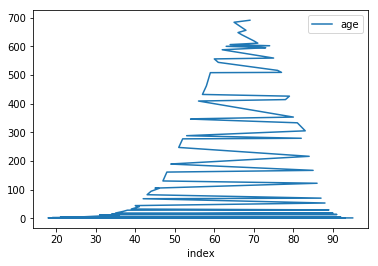

In [25]:
ages.reset_index().plot(x='index', y='age')

#### What are the ethnicity categories?
- why 3?

In [26]:
pd.DataFrame(data['ethnicity'].value_counts()).sort_values(by='ethnicity', 
                                                           ascending=False)

,ethnicity
2.0,17456
3.0,555
1.0,322
